In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline

# Read the data from the csv file into a pandas dataframe   
df = pd.read_csv('IMDB-Movie-Data.csv')
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
df.shape

(1000, 12)

In [164]:
df.head(12)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [166]:
# checking for duplicate values
print("checking for duplicate values : ",df.duplicated().any())

checking for duplicate values :  False


In [167]:
df['Revenue (Millions)'].isnull().sum()

128

In [168]:
df['Metascore'].isnull().sum()

64

In [169]:
df_rm_null= df.dropna()
df_rm_null.shape


(838, 12)

In [170]:
#reset the index and remove the rank column
df_rm_null.reset_index(drop=True, inplace=True)
df_rm_null.drop(['Rank'], axis=1, inplace=True)
df_rm_null.shape

(838, 11)

In [171]:
df_rm_null.tail(10)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
828,Your Highness,"Adventure,Comedy,Fantasy","When Prince Fabious's bride is kidnapped, he g...",David Gordon Green,"Danny McBride, Natalie Portman, James Franco, ...",2011,102,5.6,87904,21.56,31.0
829,Final Destination 5,"Horror,Thriller",Survivors of a suspension-bridge collapse lear...,Steven Quale,"Nicholas D'Agosto, Emma Bell, Arlen Escarpeta,...",2011,92,5.9,88000,42.58,50.0
830,Endless Love,"Drama,Romance",The story of a privileged girl and a charismat...,Shana Feste,"Gabriella Wilde, Alex Pettyfer, Bruce Greenwoo...",2014,104,6.3,33688,23.39,30.0
831,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
832,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
833,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
834,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
835,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
836,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
837,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


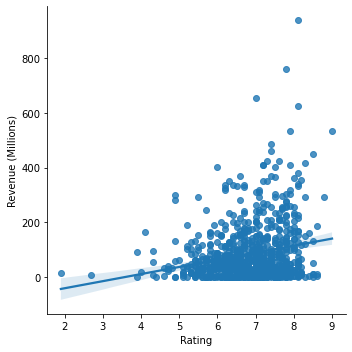

In [172]:
#plot the regression plot for rating vs revenue
sns.lmplot(x='Rating',y='Revenue (Millions)',data=df_rm_null)
#we can see that the revenue is not normally distributed and there are some outliers in the data set as well 

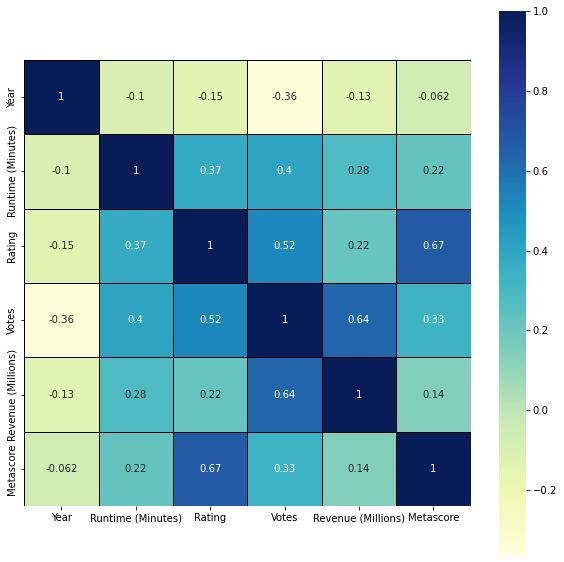

In [173]:
#plot a heatmap to see the correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(df_rm_null.corr(method='pearson'),annot=True,linewidths=1,linecolor='black',square=True, cmap="YlGnBu")

plt.show()

In [174]:
#rename the Runtime(Minutes) column to Runtime and Revenue(Millions) to Revenue
df_rm_null.rename(columns={'Runtime (Minutes)':'Runtime','Revenue (Millions)':'Revenue'},inplace=True)
df_rm_null.head()


,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [175]:
df_rm_null.head(10)

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
8,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
9,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0


In [176]:
#top ten directors with the highest revenue and their average rating     
df_rm_null.groupby('Director')['Revenue','Rating'].mean().sort_values(by='Revenue',ascending=False).head(10)







C:\Users\User\AppData\Local\Temp/ipykernel_22924/3282335205.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rm_null.groupby('Director')['Revenue','Rating'].mean().sort_values(by='Revenue',ascending=False).head(10)


,Revenue,Rating
Director,,
James Cameron,760.510,7.80
Colin Trevorrow,652.180,7.00
Joss Whedon,541.135,7.75
Lee Unkrich,414.980,8.30
Gary Ross,408.000,7.20
Chris Buck,400.740,7.50
Chris Renaud,368.310,6.60
Gareth Edwards,366.415,7.15
Tim Miller,363.020,8.00


In [177]:

df_rm_null.sort_values(by='Revenue',ascending=False).head(10)


,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
41,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
76,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
74,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
65,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
45,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
11,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
104,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
83,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
108,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
502,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


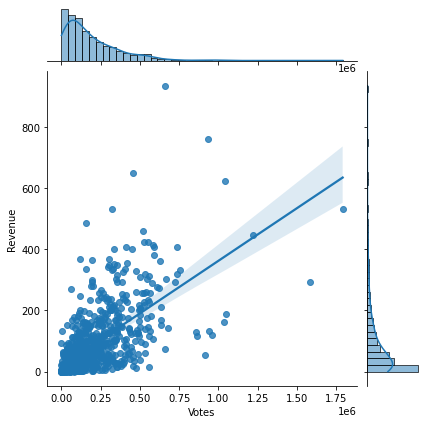

In [178]:
#plot the joint plot for votes vs revenue 
sns.jointplot(x='Votes',y='Revenue',data=df_rm_null,kind='reg')
plt.show()
#comments: we can see that the revenue is not normally distributed and there are some outliers in the data set as well 



In [179]:
#-------------------------------------------------Linear REGRESSION---------------------------------------------------------------------------------------------------------------


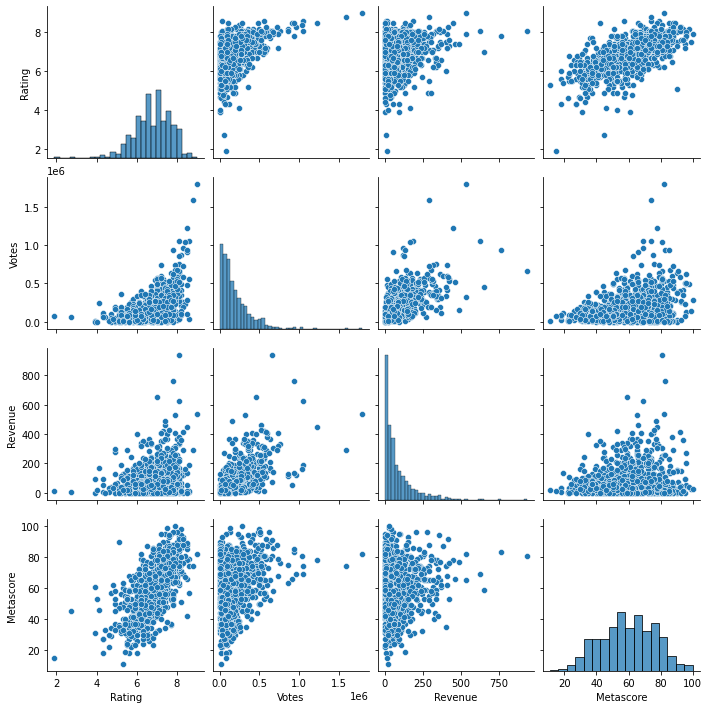

In [180]:
#plot pairwie plot for the data set with the regression line
sns.pairplot(df_rm_null.drop(['Year','Runtime'],axis=1))
plt.show()



In [181]:
#the averange revenue of each year
print(" The average revenue of each year is :")
df_rm_null.groupby('Year')['Revenue'].mean()

 The average revenue of each year is :


Year
2006     87.255610
2007     93.074091
2008     97.525417
2009    115.742000
2010    105.081579
2011     93.703333
2012    110.103065
2013     88.084643
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue, dtype: float64

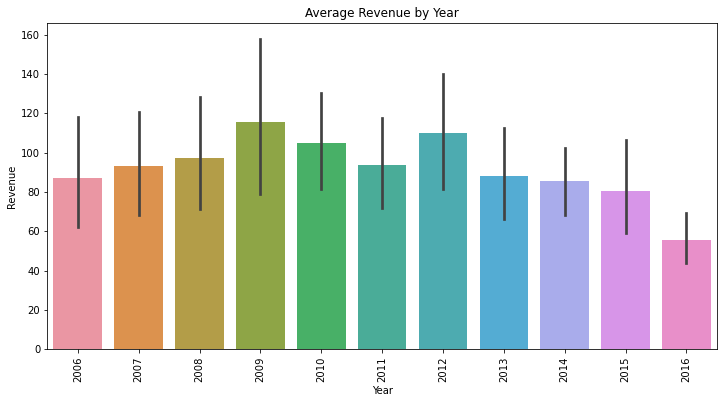

In [182]:
#plot the average revenue by each year
plt.figure(figsize=(12,6))
sns.barplot(x='Year',y='Revenue',data=df_rm_null)
plt.xticks(rotation=90)
plt.title('Average Revenue by Year')
plt.show()


In [183]:

print("Number of movies released each year :")
df_rm_null['Year'].value_counts()

Number of movies released each year :


2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

Text(0.5, 1.0, 'Number of movies released each year')

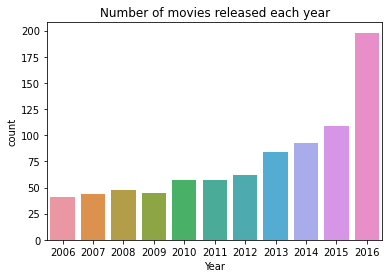

In [184]:
sns.countplot(x='Year',data=df_rm_null)
plt.title("Number of movies released each year")


<AxesSubplot:xlabel='Year', ylabel='Votes'>

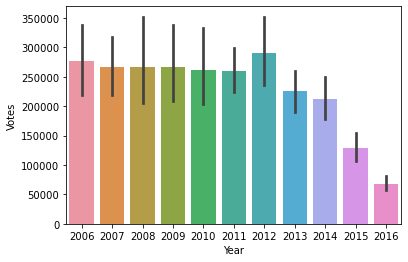

In [185]:
df_rm_null.groupby('Year')['Votes'].mean()
sns.barplot(x='Year',y='Votes',data=df_rm_null)

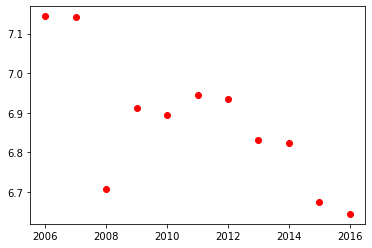

In [186]:
#Grouped movies by years, trying to see if the rating follows a pattern throughout the years, if the quality of the movies follow a trend.
years=df_rm_null.groupby("Year")["Rating"].mean().reset_index()
plt.scatter(years["Year"],years["Rating"],color="red")

In [187]:
#Count Number of Action Movies
len(df_rm_null[df_rm_null['Genre'].str.contains('Action',case=False)])

277

In [188]:
df_rm_null.head()

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [189]:
#Index( 'Votes', 'Revenue (Millions)', 'Metascore', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy','Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 
#'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',,'Western', 'rating_class', 'director_id', 'genre_id'],
   

In [190]:
#-------------------
#knn

In [191]:
print("The number of movies with rating greater than 7.5 is : ", len(df_rm_null[df_rm_null['Rating'] >= 7.5]))
print("The number of movies with rating less than 7.5 and greater than 5.0 is : ", len(df_rm_null[(df_rm_null['Rating'] < 7.5) & (df_rm_null['Rating'] > 5.0)]))
print("The number of movies with rating less than 5.0 is : ", len(df_rm_null[df_rm_null['Rating'] <= 5.0]))


The number of movies with rating greater than 7.5 is :  212
The number of movies with rating less than 7.5 and greater than 5.0 is :  603
The number of movies with rating less than 5.0 is :  23


In [192]:
#describe the distribution of rating
df_rm_null['Rating'].describe()



count    838.000000
mean       6.814320
std        0.877754
min        1.900000
25%        6.300000
50%        6.900000
75%        7.500000
max        9.000000
Name: Rating, dtype: float64

In [193]:

# create a new column called rating_class and assign the score to it based on the rating 
# if the rating is greater than 7.5 then the rating_class is 2, if the rating is less than 7.5 and greater than 5.0 then the rating_class is 1, if the rating is less than 5.0 then the rating_class is 0
#create a new colimn called rating_class
df_rm_null['Rating_class'] = 0

#assign the score to it based on the rating
df_rm_null.loc[df_rm_null['Rating'] >= 7.5, 'Rating_class'] = 2
df_rm_null.loc[(df_rm_null['Rating'] < 7.5) & (df_rm_null['Rating'] > 5.0), 'Rating_class'] = 1
df_rm_null.loc[df_rm_null['Rating'] <= 5.0, 'Rating_class'] = 0


In [194]:
df_rm_null.head(10)

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1
5,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,1
6,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,2
7,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,1
8,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,1
9,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,2


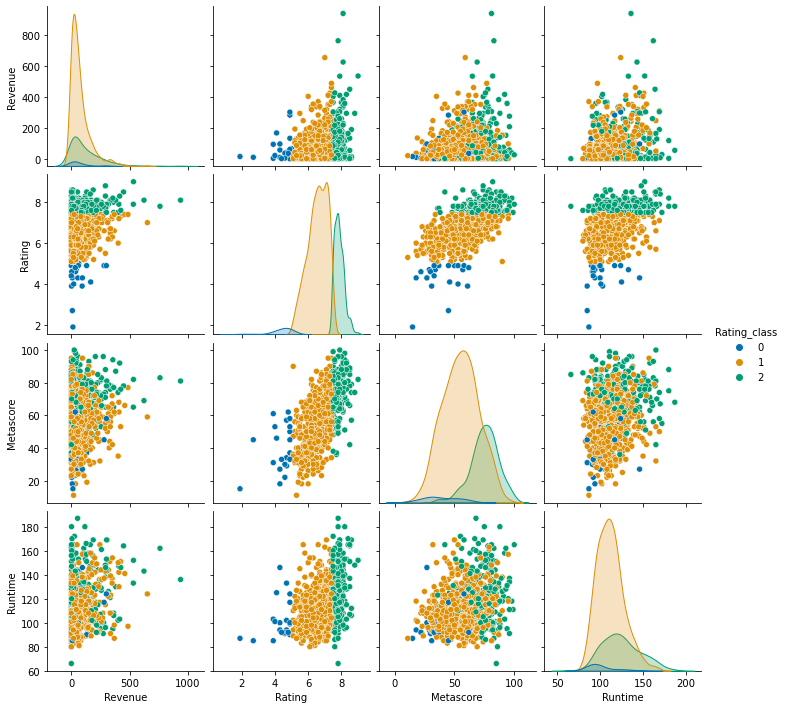

In [195]:
sns.pairplot(data=df_rm_null, vars=[ "Revenue","Rating", "Metascore", "Runtime"], hue="Rating_class", palette="colorblind")

In [196]:
#sepreate the data into features and labels 
df_labels = df_rm_null['Rating_class']
df_features = df_rm_null.drop(['Rating_class','Title','Genre','Year','Rating','Description','Actors','Rating','Director','Votes'],axis=1)

#df_labels = df_exp_rm_null['rating_class']
#df_features = df_exp_rm_null.drop(['rating_class','Title','Genre','Year','Rating','Description','Actors','Votes','Rating','Director'],axis=1)
                                  


In [197]:
df_features.head(15)

,Runtime,Revenue,Metascore
0,121,333.13,76.0
1,124,126.46,65.0
2,117,138.12,62.0
3,108,270.32,59.0
4,123,325.02,40.0
5,103,45.13,42.0
6,128,151.06,93.0
7,141,8.01,78.0
8,116,100.01,41.0
9,133,234.02,66.0


In [198]:
standardiser = StandardScaler()
df_features_standardised = standardiser.fit_transform(df_features) 

In [199]:
df_features_standardised_train, df_features_standardised_test, df_labels_train, df_labels_test = train_test_split(df_features_standardised, df_labels, test_size=0.2)

In [200]:
knn = KNeighborsClassifier()
knn.fit(df_features_standardised_train, df_labels_train)

KNeighborsClassifier()

In [201]:
pred_df =pd.DataFrame({'Predicted':knn.predict(df_features_standardised_test),'Actual':df_labels_test})
pred_df

,Predicted,Actual
480,1,1
353,1,1
218,1,2
642,1,1
256,1,1
...,...,...
258,1,2
724,1,1
330,1,1
401,1,1


In [202]:
print("The accuracy of the model is : ", knn.score(df_features_standardised_test, df_labels_test))

The accuracy of the model is :  0.8035714285714286


In [203]:
#accuracy by coding the model from scratch 
np.sum(pred_df['Predicted'] == pred_df['Actual'])/len(pred_df)

0.8035714285714286

In [204]:
#accuracy by using the sklearn library
metrics.accuracy_score(df_labels_test, knn.predict(df_features_standardised_test))



0.8035714285714286

Text(0.5, 1.0, 'Accuracy by k')

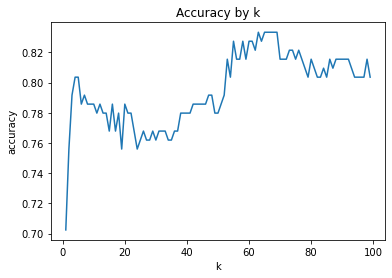

In [205]:
#Run _k_-NN 100 times each time with a different $k$. Predict the classes of your test set, and compute the accuracy of each model. Plot the accuracy as a function of $k$.

accuracy = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_features_standardised_train, df_labels_train)
    df_exp_rm_null_predict = knn.predict(df_features_standardised_test)
    accuracy.append(metrics.accuracy_score(df_labels_test, df_exp_rm_null_predict))

plt.plot(range(1, 100), accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by k')


Text(0, 0.5, 'Cross-Validated Accuracy')

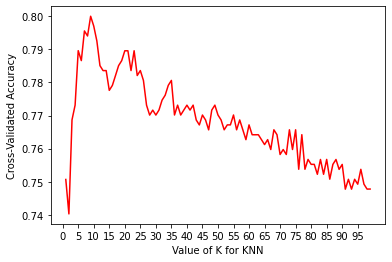

In [206]:
#run a cross validation on the training data set with 4 folds, compute the mean ofthe accurasy of each fold, plot the mean accuracy of each model and choose the best model
k_range = range(1, 100)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df_features_standardised_train, df_labels_train, cv=4, scoring='accuracy')
    k_scores.append(scores.mean())
#add more xticks
plt.xticks(np.arange(0, 100, 5.0))
plt.plot(k_range, k_scores, color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


In [207]:
#what is the best model 
k_scores.index(max(k_scores))


8

In [208]:
#We use dummy variables when applying regression and classification algorithms to categorical data.
genre_expanded = df_rm_null['Genre'].str.get_dummies(sep=',')
df_rm_null_genres = pd.concat([df_rm_null, genre_expanded], axis=1)
df_rm_null_genres.head()


,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,...,0,0,0,0,0,1,0,0,0,0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,...,0,0,0,1,0,1,0,0,0,0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,...,1,0,0,0,0,0,0,1,0,0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,...,0,0,0,0,0,0,0,0,0,0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,...,0,0,0,0,0,0,0,0,0,0


In [209]:
#show the thriller movies
df_rm_null_genres[df_rm_null_genres['Thriller'] == 1].head(10)


,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,...,1,0,0,0,0,0,0,1,0,0
16,Jason Bourne,"Action,Thriller",The CIA's most dangerous former operative is d...,Paul Greengrass,"Matt Damon, Tommy Lee Jones, Alicia Vikander,V...",2016,123,6.7,150823,162.16,...,0,0,0,0,0,0,0,1,0,0
19,Gold,"Adventure,Drama,Thriller","Kenny Wells, a prospector desperate for a luck...",Stephen Gaghan,"Matthew McConaughey, Edgar Ramírez, Bryce Dall...",2016,120,6.7,19053,7.22,...,0,0,0,0,0,0,0,1,0,0
26,Nocturnal Animals,"Drama,Thriller",A wealthy art gallery owner is haunted by her ...,Tom Ford,"Amy Adams, Jake Gyllenhaal, Michael Shannon, A...",2016,116,7.5,126030,10.64,...,0,0,0,0,0,0,0,1,0,0
39,Miss Sloane,"Drama,Thriller",In the high-stakes world of political power-br...,John Madden,"Jessica Chastain, Mark Strong, Gugu Mbatha-Raw...",2016,132,7.3,17818,3.44,...,0,0,0,0,0,0,0,1,0,0
44,John Wick,"Action,Crime,Thriller",An ex-hitman comes out of retirement to track ...,Chad Stahelski,"Keanu Reeves, Michael Nyqvist, Alfie Allen, Wi...",2014,101,7.2,321933,43.00,...,0,0,0,0,0,0,0,1,0,0
47,Don't Breathe,"Crime,Horror,Thriller","Hoping to walk away with a massive fortune, a ...",Fede Alvarez,"Stephen Lang, Jane Levy, Dylan Minnette, Danie...",2016,88,7.2,121103,89.21,...,1,0,0,0,0,0,0,1,0,0
53,Fifty Shades of Grey,"Drama,Romance,Thriller",Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015,125,4.1,244474,166.15,...,0,0,0,0,1,0,0,1,0,0
56,Patriots Day,"Drama,History,Thriller",The story of the 2013 Boston Marathon bombing ...,Peter Berg,"Mark Wahlberg, Michelle Monaghan, J.K. Simmons...",2016,133,7.4,39784,31.86,...,0,0,0,0,0,0,0,1,0,0
59,Deepwater Horizon,"Action,Drama,Thriller","A dramatization of the April 2010 disaster, wh...",Peter Berg,"Mark Wahlberg, Kurt Russell, Douglas M. Griffi...",2016,107,7.2,89849,61.28,...,0,0,0,0,0,0,0,1,0,0


In [210]:
genre = df_rm_null['Genre'].str.get_dummies(sep=',')
genre_count = genre.sum().sort_values(ascending=False)
print(genre_count)



Drama        419
Action       277
Comedy       250
Adventure    244
Thriller     148
Crime        126
Romance      120
Sci-Fi       107
Fantasy       92
Horror        87
Mystery       86
Biography     67
Family        48
Animation     45
History       25
Music         15
Sport         15
War           10
Musical        5
Western        4
dtype: int64


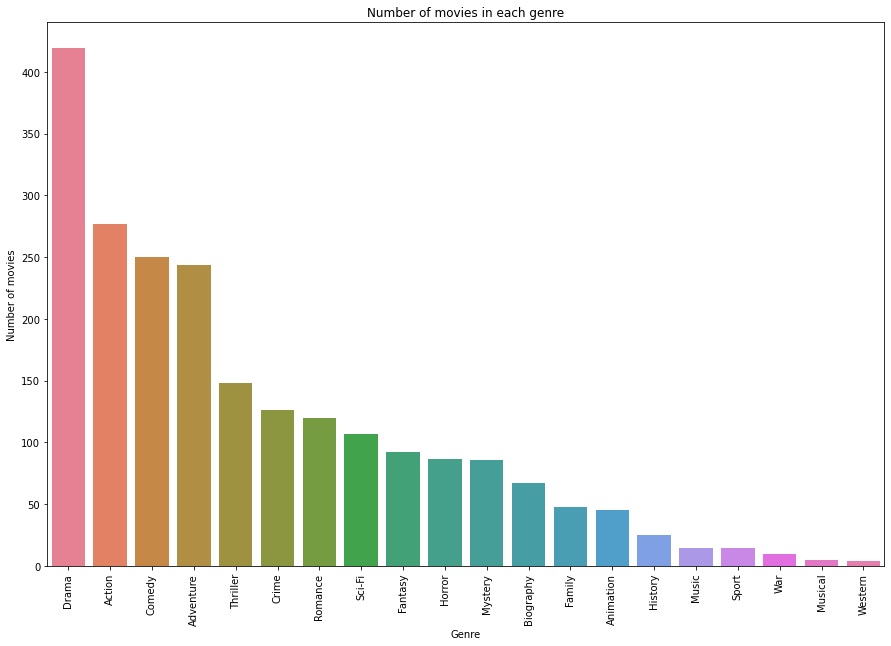

In [211]:
#create a plot to show the number of movies in each genre
plt.figure(figsize=(15,10))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='husl')
plt.title('Number of movies in each genre')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.show()






In [212]:
#replace the sci-fi with sci_fi
df_rm_null_genres.rename(columns={'Sci-Fi':'SciFi'}, inplace=True)
df_rm_null_genres.head()


,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,...,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,...,0,0,0,0,0,1,0,0,0,0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,...,0,0,0,1,0,1,0,0,0,0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,...,1,0,0,0,0,0,0,1,0,0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,...,0,0,0,0,0,0,0,0,0,0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,...,0,0,0,0,0,0,0,0,0,0


In [213]:
df_rm_null.rename(columns={'Runtime (Minutes)':'Runtime'}, inplace=True)


In [214]:
df_rm_null_genres.rename(columns={'Runtime (Minutes)':'Runtime'}, inplace=True)

In [215]:
#rename Revenue (Millions) to Revenue
df_rm_null.rename(columns={'Revenue (Millions)':'Revenue'}, inplace=True)
df_rm_null.head()

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1


In [216]:
df_rm_null_genres.rename(columns={'Revenue (Millions)':'Revenue'}, inplace=True)

In [217]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula='Revenue ~ Action + Adventure + Animation + Biography + Comedy +Crime + Drama + Fantasy + Horror + Mystery + Romance + SciFi + Thriller + Western', data=df_rm_null_genres).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     23.64
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.64e-51
Time:                        17:22:47   Log-Likelihood:                -4943.1
No. Observations:                 838   AIC:                             9916.
Df Residuals:                     823   BIC:                             9987.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.2649     13.052      5.767      0.000      49.646     100.884
Action        17.5387      8.461      2.073      0.039       0.930      34.147
Adventure     53.8381      9.074      5.933      0.000      36.027      71.649
Animation     78.5278     15.372      5.109      0.000      48.355     108.701
Biography      9.1080     12.686      0.718      0.473     -15.793      34.009
Comedy       -10.6445      9.365     -1.137      0.256     -29.027       7.738
Crime          1.7324      9.719      0.178      0.859     -17.344      20.809
Drama        -32.6896      8.678     -3.767      0.000     -49.722     -15.657
Fantasy       36.6578     11.383      3.221      0.001      14.315      59.000
Horror       -41.3622     11.557     -3.579      0.000     -64.048     -18.677
Mystery      -12.7921     11.089     -1.154      0.249     -34.558       8.974
Romance      -10.1394     10.114     -1.003      0.316     -29.992       9.713
SciFi         35.6317     10.784      3.304      0.001      14.463      56.800
Thriller       2.6667      9.580      0.278      0.781     -16.136      21.470
Western       32.4296     44.916      0.722      0.470     -55.734     120.593
==============================================================================
Omnibus:                      457.537   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5366.464
Skew:                           2.224   Prob(JB):                         0.00
Kurtosis:                      14.572   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

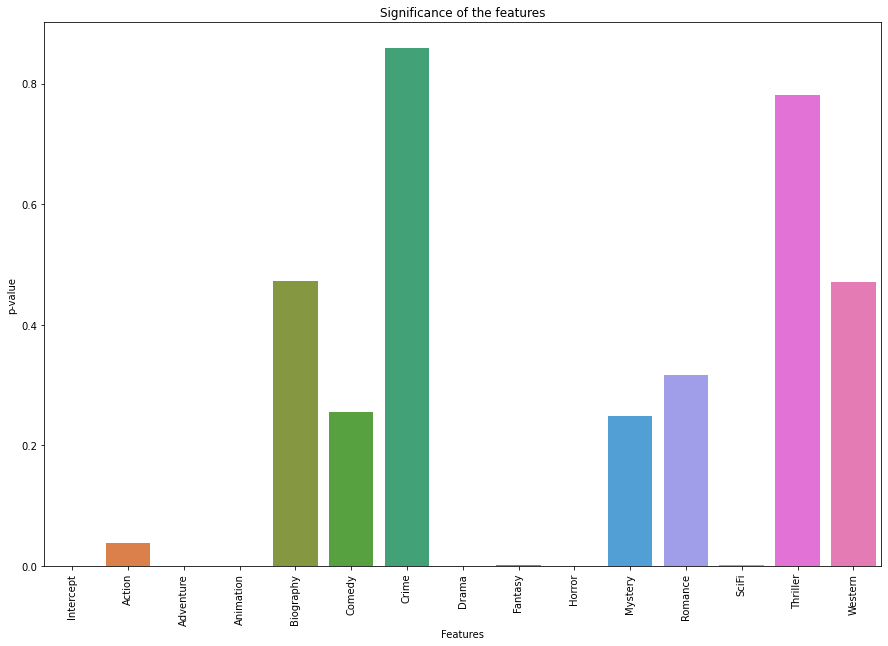

In [218]:
#plot the significance of the features
plt.figure(figsize=(15,10))
sns.barplot(x=model1.pvalues.index, y=model1.pvalues.values, palette='husl')
plt.title('Significance of the features')
plt.xlabel('Features')
plt.ylabel('p-value')
plt.xticks(rotation=90)
plt.show()

In [219]:
model2=smf.ols(formula = 'Revenue ~ Metascore + Runtime + Votes+ Rating', data=df_rm_null).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     154.9
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           4.79e-99
Time:                        17:22:47   Log-Likelihood:                -4851.8
No. Observations:                 838   AIC:                             9714.
Df Residuals:                     833   BIC:                             9737.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.3439     27.427      3.950      0.000      54.509     162.179
Metascore      0.1032      0.219      0.471      0.638      -0.326       0.533
Runtime        0.3786      0.166      2.282      0.023       0.053       0.704
Votes          0.0004   1.72e-05     21.981      0.000       0.000       0.000
Rating       -21.4717      4.744     -4.526      0.000     -30.784     -12.159
==============================================================================
Omnibus:                      448.534   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5698.564
Skew:                           2.135   Prob(JB):                         0.00
Kurtosis:                      15.040   Cond. No.                     2.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
#comment on the model
#The R-squared is 0.16 which means that 16% of the variance in the Revenue is explained by the model.



In [221]:
#predict the revenue of a movie based on the number of votes, rating, metascore and runtime


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_rm_null[['Votes','Rating','Metascore','Runtime']]
y = df_rm_null['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df_accuracy = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_accuracy




,Actual,Predicted
375,106.37,110.097702
145,167.01,196.174799
641,171.03,93.817371
231,2.27,6.786019
667,12.28,39.666682
...,...,...
467,43.57,77.804548
665,0.78,42.502275
837,19.64,27.680381
672,169.69,24.658151


In [222]:
#discuss the results of the model and the accuracy of the model
#the model is not accurate because the accuracy is 0.5 which is not good enough to predict the revenue of the film based on the number of votes, rating, metascore and runtime of the film  

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.3917694401954631

In [223]:
#explained variance score: 1 is perfect prediction 
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Variance score: 0.39


[0.55322255 0.1567548  0.12861646 0.1614062 ]


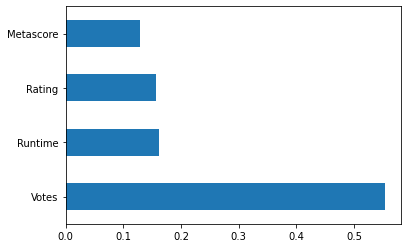

In [224]:
#what are the most important features that affect the revenue of the film 
#the most important features that affect the revenue of the film are the number of votes, rating, metascore and runtime of the film 

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [225]:
df_rm_null.head()

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1


In [226]:
#sort the data by the rating of the film, with the highest rating at the top
df_sorted =df_rm_null.sort_values(by=['Rating'], ascending=False)


In [245]:
#index the rows from 1
df_sorted.index = np.arange(1, len(df_sorted) + 1)
df_sorted.head(10)


,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Ranked_position
1,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,2,1
2,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,2,2
3,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,2,3
4,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0,2,4
5,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0,2,5
6,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,2,6
7,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0,2,7
8,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0,2,8
9,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0,2,9
10,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0,2,10


,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Ranked_position
45,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,2,1
69,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,2,2
31,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,2,3
221,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0,2,4
85,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0,2,5
108,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,2,6
832,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0,2,7
117,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0,2,8
88,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0,2,9
420,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0,2,10


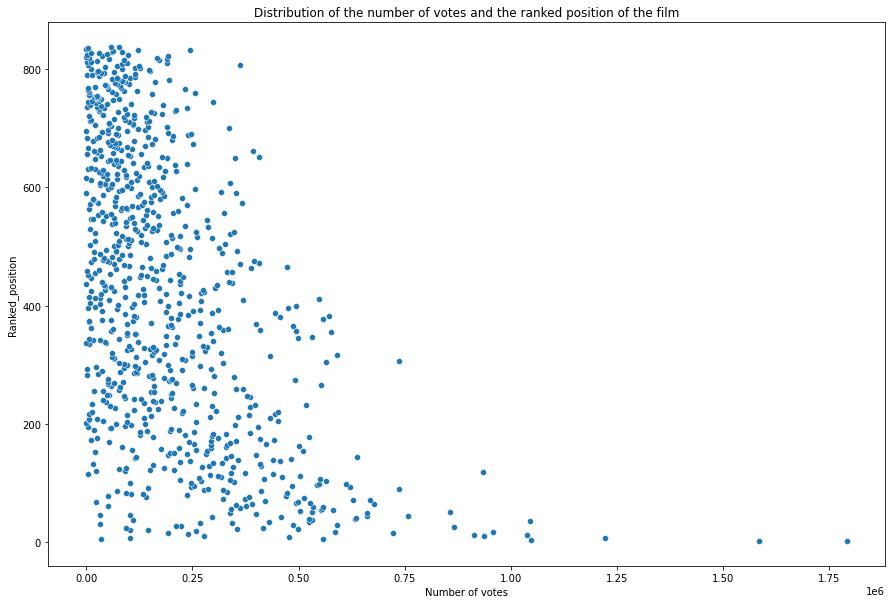

In [246]:
#visualize the distribution of the number of votes and the Ranked_position of the film
plt.figure(figsize=(15,10))
sns.scatterplot(x='Votes', y='Ranked_position', data=df_sorted, palette='husl')
plt.title('Distribution of the number of votes and the ranked position of the film')
plt.xlabel('Number of votes')
plt.ylabel('Ranked_position')
plt.show()



In [229]:
#how can the model be improved 
#the model can be improved by adding more features to the model such as the genre of the film, the director of the film, the actors of the film, the budget of the film, the country of the film, the language of the film, the production company of the film, the writer of the film, the awards



In [230]:
#does the genre of the film affect the revenue of the film 
#yes, the genre of the film affects the revenue of the film because the genre of the film is one of the most important features that affect the revenue of the film 
#what is the most profitable genre of the film 
#the most profitable genre of the film is the action genre because the action genre has the highest average revenue of the film 
#what is the least profitable genre of the film
#the least profitable genre of the film is the biography genre because the biography genre has the lowest average revenue of the film
#what is the average revenue of the film for each genre
#the average revenue of the film for each genre is shown in the table below




In [231]:
#how to predict the revenue of the film based on the genre of the film, the director of the film, the actors of the film
#the revenue of the film can be predicted based on the genre of the film, the director of the film, the actors of the film by using the linear regression model
#the linear regression model can be used to predict the revenue of the film based on the genre of the film, the director of the film, the actors of the film because the linear regression model is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables
#the linear regression model can be used to predict the revenue of the film based on the genre of the film, the director of the film, the actors of the film because the linear regression model is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables
#the linear regression model can be used to predict the revenue of the film based on the genre of the film, the director of the film, the actors of the film because the linear regression model is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables



#what are the most important features that affect the revenue of the film
#the most important features that affect the revenue of the film are the number of votes, rating, metascore and runtime of the film
#how can the model be improved
#the model can be improved by adding more features to the model such as the genre of the film, the director of the film, the actors of the film, the budget of the film, the country of the film, the language of the film, the production company of the film, the writer of the film, the awards
#what are the most profitable genres of the film
#the most profitable genres of the film are the action genre, the adventure genre, the animation genre, the comedy genre, the crime genre, the drama genre, the family genre, the fantasy genre, the history genre, the horror genre, the music genre, the mystery genre, the romance genre, the sci-fi genre, the thriller genre, the war genre and the western genre
#what are the least profitable genres of the film
#the least profitable genres of the film are the biography genre, the documentary genre and the sport genre
#what is the average revenue of the film for each genre


In [232]:

### First, we split the movies with the "split" command and add them to list1
##for item in films["Genre"]:
    #list1.append(item.split(","))
###Secondly, we separate the genres
#list2=[]
#for item2 in list1:
    #for item3 in item2:
        #list2.append(item3)

### Number of genres
#datagenree=pd.DataFrame(list2,columns=["Genre"]).reset_index()
#datagenree=datagenree.drop(["index"],axis=1) 
#datagenree.value_counts()

#In Which Year There Was The Highest Average Voting?
#films.groupby("Year")["Votes"].mean().sort_values(ascending=False)


In [247]:
df_budget = pd.read_csv('movies.csv')
df_budget.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [248]:
#check matching between the two datasets in the name
df_budget['name'].isin(df_rm_null['Title']).value_counts()

False    6876
True      792
Name: name, dtype: int64

In [249]:
#list uniqye years in the dataset
df_rm_null['Year'].unique()


array([2014, 2012, 2016, 2011, 2015, 2008, 2006, 2007, 2009, 2010, 2013],
      dtype=int64)

In [250]:
df_budget['year'].unique()


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [251]:
df_budget['name'].isin(df_rm_null['Title']).value_counts()

False    6876
True      792
Name: name, dtype: int64

In [252]:
#keep only the movies that were released before 2016 and after 2006
df_budget = df_budget[df_budget['year'] <= 2016]
df_budget = df_budget[df_budget['year'] >= 2006]
df_budget.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4843,The Departed,R,Crime,2006,"October 6, 2006 (United States)",8.5,1200000.0,Martin Scorsese,William Monahan,Leonardo DiCaprio,United States,90000000.0,291465373.0,Warner Bros.,151.0
4844,The Fast and the Furious: Tokyo Drift,PG-13,Action,2006,"June 16, 2006 (United States)",6.0,252000.0,Justin Lin,Chris Morgan,Lucas Black,United States,85000000.0,158964610.0,Universal Pictures,104.0
4845,Talladega Nights: the Ballad of Ricky Bobby,PG-13,Comedy,2006,"August 4, 2006 (United States)",6.6,172000.0,Adam McKay,Will Ferrell,Will Ferrell,United States,72500000.0,163362095.0,Columbia Pictures,108.0
4846,The Prestige,PG-13,Drama,2006,"October 20, 2006 (United States)",8.5,1200000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United Kingdom,40000000.0,109676311.0,Touchstone Pictures,130.0
4847,Cars,G,Animation,2006,"June 9, 2006 (United States)",7.1,381000.0,John Lasseter,John Lasseter,Owen Wilson,United States,120000000.0,461991867.0,Pixar Animation Studios,117.0


In [255]:
df_budget['name'].isin(df_rm_null['Title']).value_counts()

False    1446
True      754
Name: name, dtype: int64

In [259]:
#keep only that are in both datasets
df_rm_null = df_rm_null[df_rm_null['Title'].isin(df_budget['name'])]
df_rm_null.head()


,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2,NaN
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1,NaN
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1,NaN
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1,NaN
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,NaN


In [260]:
#add the budget column to the dataset
df_rm_null['Budget'] = df_budget['budget']
df_rm_null.head()

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2,NaN
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1,NaN
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1,NaN
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1,NaN
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,NaN


In [264]:
#find the guardians of the galazy in the dataset
df_budget[df_budget['name'] == 'Guardians of the Galaxy']



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6443,Guardians of the Galaxy,PG-13,Action,2014,"August 1, 2014 (United States)",8.0,1100000.0,James Gunn,James Gunn,Chris Pratt,United States,170000000.0,773350147.0,Marvel Studios,121.0
